In [0]:
!pip install tensorflow
!pip install pillow
!pip install numpy

In [2]:
# upload the model zip - Tensorflow version - from https://customvision.ai/projects
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())


files = upload_files()

Saving e39b2666938d4b4580452c548ba2b1ad.zip to e39b2666938d4b4580452c548ba2b1ad (1).zip


In [3]:
#select the first file -> model zip
import zipfile
modelZip = files[0]

print(modelZip)

#unzip the model
import zipfile
zip = zipfile.ZipFile(modelZip)
zip.extractall('exportedModel')

e39b2666938d4b4580452c548ba2b1ad.zip


In [4]:
import os
# you should see two files: 
# 'labels.txt', 'model.pb'
os.listdir("./exportedModel")

['model.pb', 'labels.txt']

In [0]:
import tensorflow as tf
import os  

graph_def = tf.GraphDef()
labels = []

filename = "./exportedModel/model.pb"
labels_filename = "./exportedModel/labels.txt"

# Import the TF graph
with tf.gfile.FastGFile(filename, 'rb') as f:
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

# Create a list of labels.
with open(labels_filename, 'rt') as lf:
    for l in lf:
        labels.append(l.strip())

Saving 2265579414_2e00a8f265_n.jpg to 2265579414_2e00a8f265_n.jpg


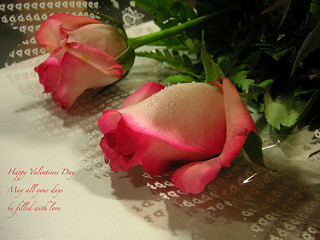

In [28]:
# Load from a file
imageFile = upload_files()[0]

#display the uploaded file
from IPython.display import Image, display
display(Image(imageFile))

In [0]:
import PIL.Image
image = PIL.Image.open(imageFile)

In [0]:
def crop_center(img,cropx,cropy):
    w,h = img.size
    startx = w//2-(cropx//2)
    starty = h//2-(cropy//2)
    return img.crop((startx, starty, startx+cropx, starty+cropy))

def resize_down_to_1600_max_dim(image):
    w,h = image.size
    if (h < 1600 and w < 1600):
        return image

    new_size = (1600 * w // h, 1600) if (h > w) else (1600, 1600 * h // w)
    return image.resize(new_size, PIL.Image.BILINEAR)   

def resize_to_256_square(image):    
    w,h = image.size
    return image.resize((256, 256), PIL.Image.BILINEAR)  

In [31]:
# We next get the largest center square
w,h = image.size
print(w,h)
min_dim = min(w,h)
max_square_image = crop_center(image, min_dim, min_dim)

# Resize that square down to 256x256
augmented_image = resize_to_256_square(max_square_image)

# The compact models have a network size of 227x227, the model requires this size.
network_input_size = 227

# Crop the center for the specified network_input_Size
augmented_image = crop_center(augmented_image, network_input_size, network_input_size)

(320, 240)


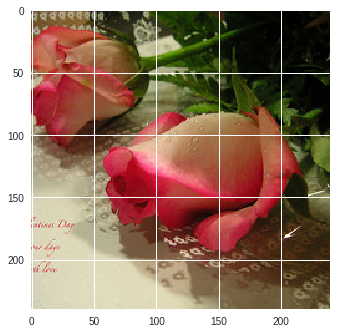

In [32]:
# RGB -> BGR
import numpy as np
r,g,b = np.array(augmented_image).T
# bgr_image = np.array([r,g,b]).transpose()
bgr_image = np.array([b,g,r]).transpose()

from matplotlib.pyplot import imshow
#imshow(np.asarray(image))
imshow(np.asarray(max_square_image))


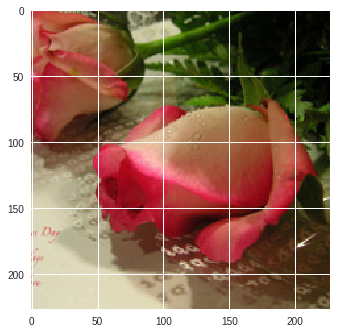

In [33]:
imshow(np.asarray(augmented_image))


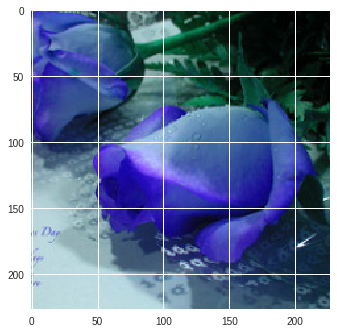

In [34]:
imshow(np.asarray(bgr_image))

In [0]:
# These names are part of the model and cannot be changed.
output_layer = 'loss:0'
input_node = 'Placeholder:0'

with tf.Session() as sess:
    prob_tensor = sess.graph.get_tensor_by_name(output_layer)
    predictions, = sess.run(prob_tensor, {input_node: [bgr_image] })

In [36]:
   # Print the highest probability label
    highest_probability_index = np.argmax(predictions)
    print('Classified as: ' + labels[highest_probability_index])
    
    # Or you can print out all of the results mapping labels to probabilities.
    label_index = 0
    for p in predictions:
        truncated_probablity = np.float64(round(p,4))
        print (labels[label_index], truncated_probablity)
        label_index += 1

Classified as: rose
('daisy', 0.0)
('dandelion', 0.0)
('rose', 0.9757)
('sunflower', 0.0)
('tulip', 0.1756)
